# **Algorithmic Methods for Data Mining: Homework 5**

**Author:** Miguel Angel Sanchez Cortes

*MSc. in Data Science, Sapienza University of Rome*

---

## **0. Uploading the Classes and Modules**

Before doing any kind of analysis it is necessary to upload both the relevant Classes and Modules we will use to work.

In [1]:
from modules.data_handler import DataHandler
from modules.frontend import Frontend
from modules.backend import Backend

## **1. Graphs Setup and Data Preprocessing**

In this homework, based on Kaggle's [Citation Network Dataset](https://www.kaggle.com/datasets/mathurinache/citation-network-dataset), we were asked to create two different networks:

1. **Citation Network:** This unweighted and directed network represents the paper's citation relationships. Each edge represents the citation given from one paper to another. For example, if paper A has cited paper B, we should expect an edge from node A to B.

2. **Collaboration Network:** This weighted and undirected graph represents the collaborations of the paper's authors. In this case, we simply took as a weight the **number of times** an author collaborated with another author. For example, if an author A has collaborated 5 times with author B, we should expect an edge with weight 5 from A to B (or viceversa since its undirected).

Since the dataset is quite large and it didn't fit into memory as it is, we then decided to approximate the **most connected component** of the graph as follows:

> We identified the top **10,000** papers with the **highest number** of citations and then built our Citation and Collaboration graphs by taking into account just the interactions between these papers and ignored the rest.

To do this, we built a custom-made `DataHandler` class where we performed this process and constructed both of our graphs following this process:

1. First, we mantained the top **10,000** papers with the **highest number** of citations and their information in a Max-Heap in order to make sorting as quick as possible.

2. Then, for the Citation Network we constructed the directed edges by creating a list of tuples where the first element is the outgoing node and the second element is the receiving node for all the papers in the Max-Heap. Afterwards, we just ignored the tuples where the receiving end wasn't part of the papers in the Max-Heap.

3. For the Collaboration Network we constructed the undirected weighted edges by creating a list of tuples where both elements are authors that collaborated on a given paper included in the Max-Heap. Afterwards, we counted the number of times a given edge repeated in the list and this gave us the weight of the edge, since it is the **number of times** two authors collaborated.

In the end, we finished with two `NetworkX` graphs ready to use for our next tasks. For more information about the **implementation** of this class and the construction of the networks please consult the `data_handler.py` file in the `modules` folder of this repository. 

As a first task, we can initialize the `DataHandler` class and obtain our networks:

In [2]:
#Here we initialize the Data Handler class that contains our citation and collaboration networks
data_handler = DataHandler()

#Here we can rename the networks into local variables for easier access
citation_network = data_handler.citation_network
collaboration_network = data_handler.collaboration_network

#Here we can print their type to see that they are indeed networkx graphs
print(type(citation_network))
print(type(collaboration_network))

<class 'networkx.classes.digraph.DiGraph'>
<class 'networkx.classes.graph.Graph'>


As we can see we indeed have two Networks where the first is **directed** and the second one isn't. Now we're ready to explore and visualize our networks.

## **2. Graphs Implementation & Visualization**

In order to explore our graphs we implemented two custom-made classes that **tightly** depend on one another: `Backend` and `Frontend`:

- `Backend`: As the name of the class tells, this is the backend implementation of all the algorithms needed to explore our graphs and perform the given tasks for our homework. This class contains 5 main functionalities:

    - `functionality_1`: Function that obtains general information about our graphs.

    - `functionality_2`: Function that obtains centrality measurements for a node in a graph.

    - `functionality_3`: Function that returns the shortest ordered walk from a node A to node B for the **Collaboration Network**.

    - `functionality_4`: Function that returns the minimum number of edges required to disconnect the **Collaboration Network** in two disconnected subgraphs.

    - `functionality_5`: Function that returns the minimum number of edges that should be removed to form communities in the **Citation Network** and the formed communities.

- `Frontend`: As the name of the class tells, this is the frontend implementation of the `Backend` class, with this class we implemented visualizations for all the previous functionalities.

For more information about the **implementation** of these classes please consult the `backend.py` and `frontend.py` files in the `modules` folder of our repository.

Since making a separate analysis of both classes doesn't make sense since they are both dependent on each other, we decided to show the visualizations on the notebook and at the same time explain how we got to those visualizations.

### **2.1. Functionality 1: Graph's Features**

As a first task we obtained general information of both our networks. Specifically, using `NetworkX` functionalities we obtained:

1. The network's number of nodes.

2. The network's number of edges.

3. The network's density. Defined for undirected (directed graphs don't include the $2$ factor) networks as:
\begin{equation*}
d = \frac{2m}{n(n-1)}
\end{equation*}

4. Average degree of the network.

5. Whether the network is dense or sparse. This was obtained by defining a **density threshold** i.e. if the network's density is above this threshold the network is **dense** and if it isn't it is **sparse**. We defined our density threshold as: $d_{t} = 0.8$.

We can visualize these features for both our networks via a **table**. To do this visualization we used the `print_graph_information` function of our `Frontend` class. For example, for the **Collaboration Network**:



In [14]:
#Here we use the Frontend class to print the general information about the networks
#In this case we print the general information of the Collaboration Network
Frontend().print_graph_information(collaboration_network, "collaboration", "general information")

╒═══════════════════╤═══════════════════╤═════════════════╤══════════════════╤════════════╕
│   Number of Nodes │   Number of Edges │   Graph Density │   Average Degree │ Is Dense   │
╞═══════════════════╪═══════════════════╪═════════════════╪══════════════════╪════════════╡
│             20193 │            136434 │     0.000669225 │           13.513 │ False      │
╘═══════════════════╧═══════════════════╧═════════════════╧══════════════════╧════════════╛


As we can see, this network has $20193$ nodes (authors), with $136434$ edges (collaborations between them) with a very small density (indeed the network is **sparse**) and an average degree of $\sim 13.5$, meaning that there authors have on average 13 collaborations with other authors.

We can do the same for the **Citation Network**:

In [15]:
#Here we use the Frontend class to print the general information about the networks
#In this case we print the general information of the Citation Network
Frontend().print_graph_information(citation_network, "citation", "general information")

╒═══════════════════╤═══════════════════╤═════════════════╤═════════════════════╤══════════════════════╤════════════╕
│   Number of Nodes │   Number of Edges │   Graph Density │   Average In Degree │   Average Out Degree │ Is Dense   │
╞═══════════════════╪═══════════════════╪═════════════════╪═════════════════════╪══════════════════════╪════════════╡
│              9426 │             52280 │     0.000588473 │             5.54636 │              5.54636 │ False      │
╘═══════════════════╧═══════════════════╧═════════════════╧═════════════════════╧══════════════════════╧════════════╛


As we can observe since this is a **directed graph** we divided the Average Degree into: **Avg. In-Degree** and **Avg. Out-Degree** since it is important to distinguish when edges go out (citations are given) and when edges go in (citations are received). We can see that on average, papers receive the same citations as the ones given.

Now, these are not the only features we can visualize from our graphs. We can also observe the graph's **hubs**. Hubs are nodes having degrees more extensive than the 95th percentile of the degree distribution. In little words, are nodes that have a big degree compared to the majority of nodes in a network. Since there can be a lot of hubs in a network, we decided to print only the **top-10** to avoid filling the notebook with unnecessary prints.

For the **Collaboration Network**:

In [19]:
#Here we use the Frontend class to print the networks top 10 hubs
#In this case we print the top 10 hubs of the Collaboration Network
Frontend().print_graph_information(collaboration_network, "collaboration", "hubs")

╒═════════════╤══════════════╤═══════════════╤═══════════════╤═════════════════════════╤═══════════════╤════════════════╤══════════════════╤══════════════╤════════════════════╤═══════════════════╕
│ Top 10 Hubs │ Julian Gough │ Rolf Apweiler │ Rodrigo Lopez │ Christian J. A. Sigrist │ Boris Lenhard │ Albin Sandelin │ Darren A. Natale │ Alex Bateman │ Wyeth W. Wasserman │ Anthony Mathelier │
╘═════════════╧══════════════╧═══════════════╧═══════════════╧═════════════════════════╧═══════════════╧════════════════╧══════════════════╧══════════════╧════════════════════╧═══════════════════╛


As we can see these are the Top-10 hubs (in order) for our Collaboration Graph. If we do the same for our **Citation graph**:

In [20]:
#Here we use the Frontend class to print the networks top 10 hubs
#In this case we print the top 10 hubs of the Collaboration Network
Frontend().print_graph_information(citation_network, "citation", "hubs")

╒══════════════════╤═════════════════════════════════════════════════════════════╤═════════════════════════════════════════════╤══════════════════════════════════════════════════════════════════════════════════════════════╤════════════════════════════════════════════════════════════════════╤═════════════════════════════════════════════════╤════════════════════════════════════════════════════════╤═══════════════════════════════════════╤══════════════════════════════════╤═══════════════════════════════════════════════════════════╤════════════════════════════════════════════════════════╕
│ Top 10 In Hubs   │ Distinctive Image Features from Scale-Invariant Keypoints   │ The Nature of Statistical Learning Theory   │ Perceived usefulness, perceived ease of use, and user acceptance of information technology   │ Genetic algorithms in search, optimization, and machine learning   │ The Mathematical Theory of Communication        │ Histograms of oriented gradients for human detection   │ C4.5: Pr

As we can see, here we distinguished between **In Hubs** and **Out Hubs** since it is not the same to be a node with a very high in-degree than a node with a very high out-degree. **In Hubs** should show us papers that are most-cited among all the papers in our graph whereas **Out Hubs** should show us papers that cited a lot of other papers in the graph.

Finally, we could also observe the **Degree Distribution** of each one of our graphs since this could give us insight into the structural characteristics and connectivity patterns within each one of the networks. For the **Collaboration Network**:

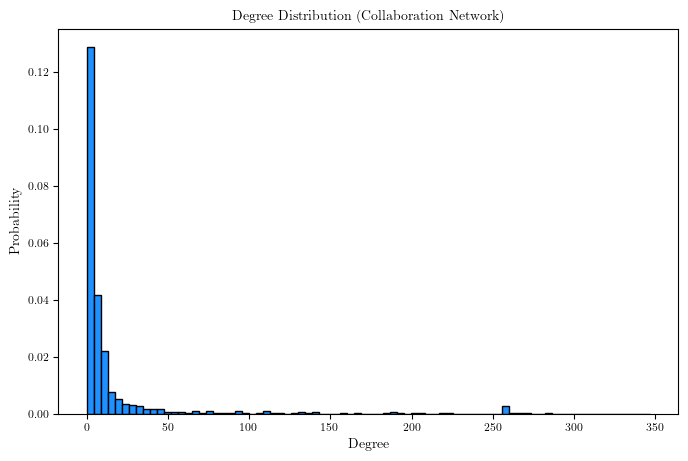

In [3]:
#Here we use the Frontend class to plot the networks degree distribution
#In this case we plot the degree distribution of the Collaboration Network
Frontend().print_graph_information(collaboration_network, "collaboration", "degree distribution")

As we can see the degrees in this network are left-skewed, meaning that is more common to find nodes with "small" degree. Also we can observe that almost all of our nodes have degree between $0$-$50$ but there are also **outliers** or hubs with very high degree values (a lot of collaborations).

For the **Citation Network**:

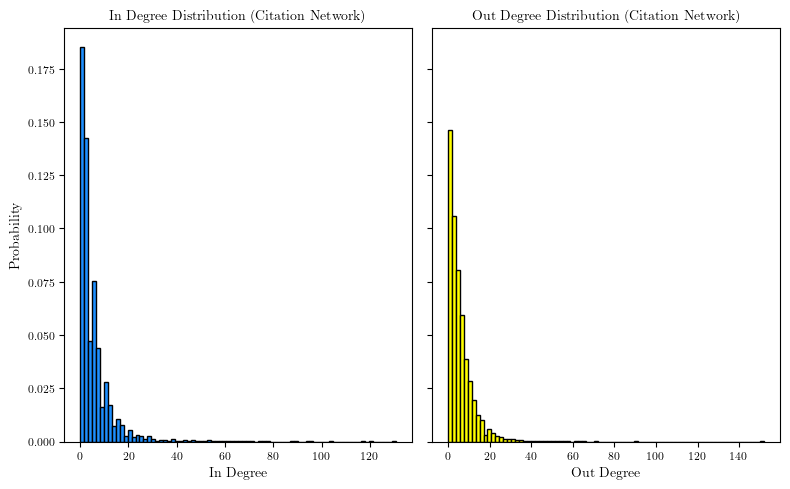

In [4]:
#Here we use the Frontend class to plot the networks degree distribution
#In this case we plot the degree distribution of the Citation Network
Frontend().print_graph_information(citation_network, "citation", "degree distribution")

As we can see we also divided the Degree Distribution into **In-Degree** and **Out-Degree** Distribution since this can help us obtain insights about the outgoing and ingoing behaviours of our Citation Network. We can observe that the in-degrees are more concentrated in small-degrees whereas the probability of finding a node of high degree is more evenly distributed in the out-degree case.

### **2.2. Functionality 2: Nodes' contribution**

Now that we observed the main information of our Networks we can also observe the **specifics**. The purpose of the second functionality is to identify papers/authors who have significantly contributed to their field of study. We can do this by obtaining the following centrality measures:

1. **Betweeness Centrality:** Is a centrality measure that assesses the importance of a node within a network based on its ability to act as a bridge or intermediary between other nodes. Mathematically it is defined as: 

    $$c_{B}(v) = \sum_{s,t\in V} \frac{\sigma(s,t|v)}{\sigma(s,t)},$$

    where $V$ is the set of nodes, $\sigma(s,t)$ is the number of shortest $(s,t)$-paths and $\sigma(s,t|v)$ is the number of those paths passing through some node $v$ other than $s$.

2. **PageRank Centrality:**  Is a centrality measure that evaluates the importance of a node in a network based on the concept of "recommendation". It assigns each node a score based on both the number and **quality** of incoming edges. In the context of academic networks, this measure helps identify papers or authors who are not only prolific but also well-connected within the academic community.

3. **Closeness Centrality:** Is a centrality measure that quantifies how close a node is to all other nodes in the network, emphasizing the efficiency of information flow. Mathematically, for a node $v$ is calculated as the reciprocal of the average shortest path length from $v$ to all other nodes in the network:

$$c_{C}(v) = \frac{1}{\sum_{v\neq u} d(v,u)}$$

4. **Degree Centrality:** Is a centrality measure that assesses the importance of a node based on the number of direct connections it has. Mathematically it is simply the fraction of edges that are connected to $v$ from the total number of edges in the network.

We can visualize these centrality measures for each Network using the `print_node_centrality()` function of our `Frontend` class. For example, for the **Collaboration Network** we can print the centrality measures of a well-known author on networks: Jure Leskovec.


In [13]:
#Here we use the Frontend class to print centrality measures of a specific node: Jure Leskovec
#In this case we print the centrality measures of Jure Leskovec in the Collaboration Network
Frontend().print_node_centrality(collaboration_network, "Jure Leskovec", "collaboration")

╒══════════════════════════╤═════════════╤════════════════════════╤═════════════════════╕
│   Betweenness Centrality │   Page Rank │   Closeness Centrality │   Degree Centrality │
╞══════════════════════════╪═════════════╪════════════════════════╪═════════════════════╡
│               0.00414913 │  0.00028735 │              0.0614987 │          0.00123811 │
╘══════════════════════════╧═════════════╧════════════════════════╧═════════════════════╛


As we can see the centrality measures (all normalized from 0 to 1) are not very high which means that this author is not very important in our network. We can try the same for our **Citation Network**, in this case a random paper called "Organizational Memory":

In [18]:
#Here we use the Frontend class to print centrality measures of a specific node: Organizational Memory
#In this case we print the centrality measures of Organizational Memory in the Citation Network
Frontend().print_node_centrality(citation_network, "Organizational Memory", "citation")

╒══════════════════════════╤═════════════╤════════════════════════╤═════════════════════╕
│   Betweenness Centrality │   Page Rank │   Closeness Centrality │   Degree Centrality │
╞══════════════════════════╪═════════════╪════════════════════════╪═════════════════════╡
│                        0 │ 0.000289152 │             0.00471215 │         0.000954907 │
╘══════════════════════════╧═════════════╧════════════════════════╧═════════════════════╛


In this case we observe the same results, we didn't choose very wisely our nodes. Since the calculation of centrality measures is very computationally expensive we just made an example with these two nodes and will leave a more complex analysis for another time.

### **2.3. Functionality 3: Shortest Ordered Walk**

For this functionality, we were asked to find the **shortest walk** of collaborations we need to read to get from a source author $A_{1}$ to a target author $A_{n}$ passing through an ordered set of authors $\{A_{2}, \dots, A_{n-1}\}$. To obtain this walk we performed the following procedure:

> We obtained the **shortest paths** (and distances) from each pair of nodes from the source to the target node using the Dijkstra algorithm. In other words, we used the Dijkstra algorithm to obtain the shortest path from the source node $A_{1}$ to node $A_{2}$, then the shortest path from $A_{2}$ to $A_{3}$ and so on until we arrived to the target node. This way we ensured we found the shortest **ordered** path (passing through each node) from the source to the target node.

By performing the Dijkstra algorithm we were able to obtain the distance and the complete path followed by us to the target node. In order to implement the Dijkstra algorithm we used a **Fibonacci Heap**. The choice of this data structure was made because according to the [book](http://aris.me/contents/teaching/data-mining-ds-2023/resources/DPV-dijkstra.pdf):

> It is the **fastest** data structure since it has $O(\log|V|)$ time complexity when obtaining the minimum value and $O(1)$ time complexity when inserting and performing the `decreasekey()` operation (increasing the priority of an element of the heap).

We used a Python library to create the Fibonacci Heap called `fibheap`. For more information about its implementation please refer to their [documentation](https://github.com/quangntran/fibheap).

As an example of the implementation of this functionality we can show the **Visualization 3** for the Collaboration Network. Specifically, we can show the shortest path between two nodes: "Rob Fergus" and "Ross Girshick".

Let's note before that in order to increase the efficiency of our algorithm, whenever the list of nodes we should pass through is not given, we simply obtain the shortest path between the two nodes:

The length of the shortest path between Rob Fergus and Ross Girshick is 5


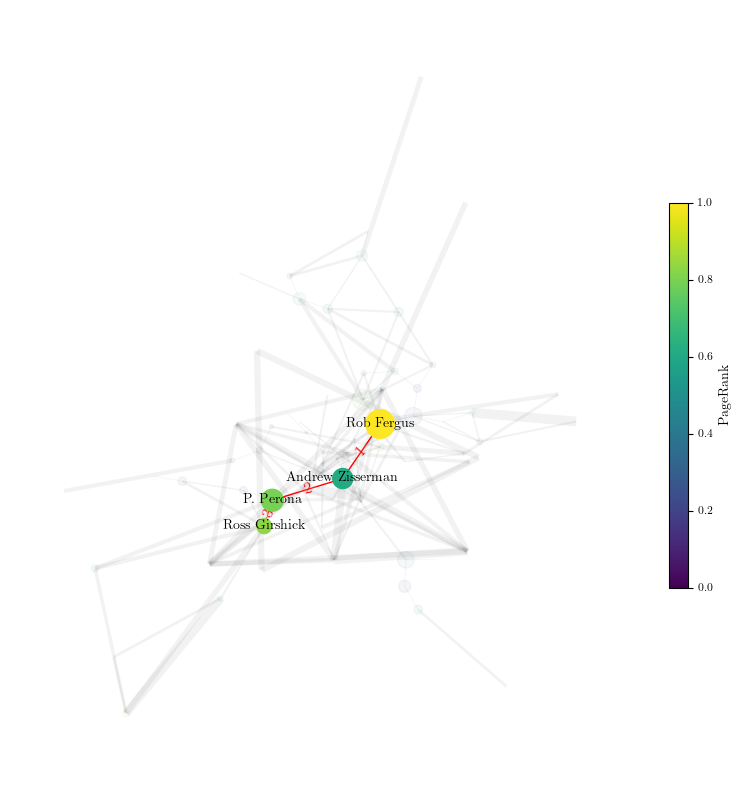

In [3]:
#Here we plot the shortest path between two nodes in the Collaboration Network by coloring the nodes in the path red
#In this case we plot the shortest path between Rob Fergus and Ross Girshick
Frontend().plot_shortest_walk(collaboration_network, "Rob Fergus", "Ross Girshick", N=100)

As we can see the path goes in order like this: **Rob Fergus** -> **Andrew Zisserman** -> **P. Perona** -> **Ross Girschick**.

We can observe that in the graph we selected a subset of $N=100$ nodes in order to better visualize our graph, where we colored the edges in the path as red and labeled them according to the order we should pass them through. In the same way, to make visualization smoother, we colored the nodes according to their **PageRank** centrality and their size according to their **Betweeness** centrality.

In [3]:
paper1 = "Nonlinear component analysis as a kernel eigenvalue problem"
paper2 = "User cooperation diversity. Part I. System description"
dictionary = Backend().functionality_5(citation_network, paper1, paper2, N=500)

The graph is not connected. We will use the largest connected component


In [4]:
I = dictionary["cut_graph"]

In [5]:
H = dictionary["original_graph"]

In [31]:
#Here we color each node depending on which community it belongs to
#If it belongs to component 1 it is colored red, if it belongs to component 2 it is colored blue

colors = []
sizes = []
node1_id, node2_id = dictionary["node_ids"]
for node in I.nodes():
    if node in dictionary["component_1"]:
        if node == node1_id or node == node2_id:
            colors.append("red")
            sizes.append(500)
        else:
            colors.append("lightcoral")
            sizes.append(50)
    else:
        if node == node1_id or node == node2_id:
            colors.append("blue")
            sizes.append(500)
        else:
            colors.append("dodgerblue")
            sizes.append(50)

The two nodes: Nonlinear component analysis as a kernel eigenvalue problem and User cooperation diversity. Part I. System description belong to different communities


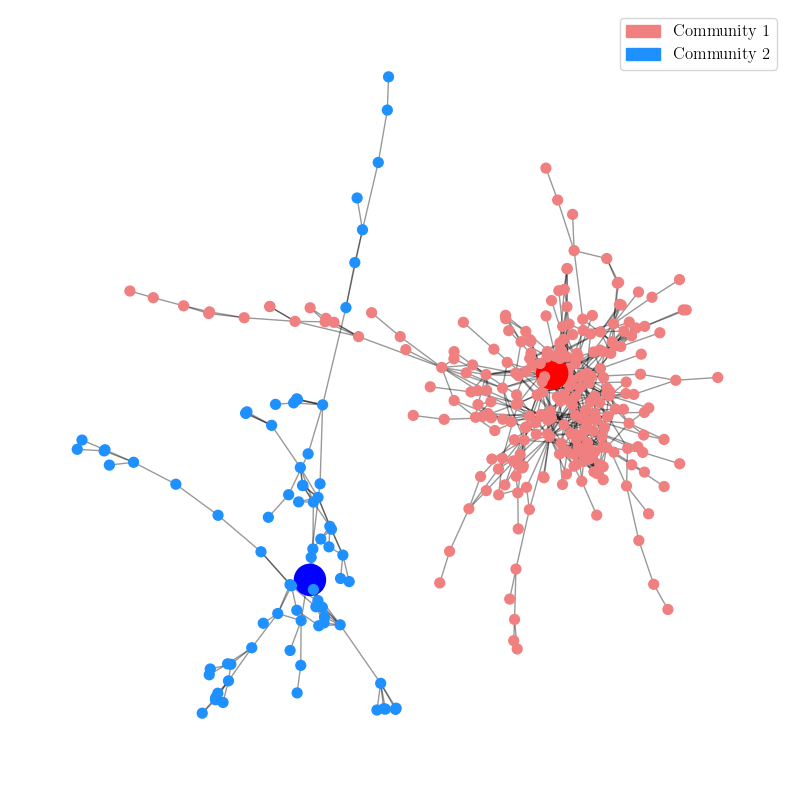

In [50]:
import networkx as nx
import matplotlib.pyplot as plt
#Here we add a label box that shows the color code of the nodes
import matplotlib.patches as mpatches

plt.figure(figsize=(10,10))
#Now we plot the nodes with a Kamada-Kawai layout, where the size and the color of the nodes depend on the betweenness centrality and the pagerank.
pathcollection = nx.draw_networkx_nodes(I,
        pos=nx.spring_layout(I, k=0.01, iterations=50, seed=42),
        node_size=sizes,
        node_color=colors)

#Now we plot the edges with a Kamada-Kawai layout, where the width and the color of the edges depend on the weight of the edges.
nx.draw_networkx_edges(I,
        pos=nx.spring_layout(I, k=0.01, iterations=50, seed=42),
        alpha=0.4)

plt.axis('off')

red_patch = mpatches.Patch(color='lightcoral', label=f'Community 1')
blue_patch = mpatches.Patch(color='dodgerblue', label=f'Community 2')
plt.legend(handles=[red_patch, blue_patch], loc='upper right', fontsize=12)

In [ ]:
if dictionary["same_community"]:
    if node1_id in dictionary["component_1"]:
        print(f"The two nodes: {paper1} and {paper2} belong to the same community: Community 1")
    else:
        print(f"The two nodes: {paper1} and {paper2} belong to the same community: Community 2")

else:
    if node1_id in dictionary["component_1"]:
        print(f"{paper1} belongs to Community 1")
        print(f"{paper2} belongs to Community 2")
    else:
        print(f"{paper1} belongs to Community 2")
        print(f"{paper2} belongs to Community 1")

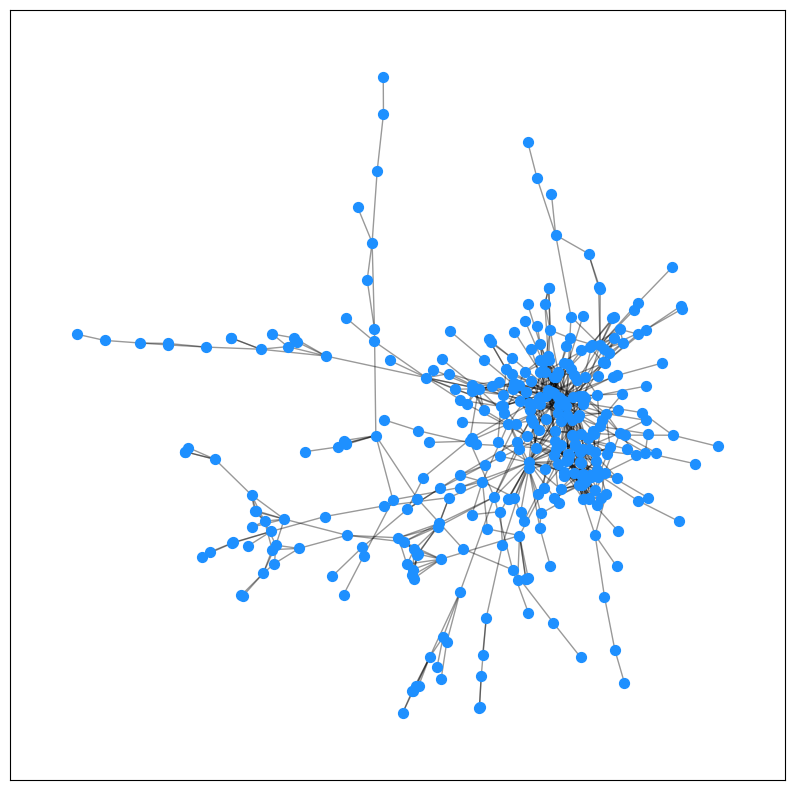

In [45]:
import networkx as nx
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
#Now we plot the nodes with a Kamada-Kawai layout, where the size and the color of the nodes depend on the betweenness centrality and the pagerank.
pathcollection = nx.draw_networkx_nodes(H,
        pos=nx.spring_layout(H, k=0.01, iterations=50, seed=42),
        node_color="dodgerblue",
        node_size=50)

#Now we plot the edges with a Kamada-Kawai layout, where the width and the color of the edges depend on the weight of the edges.
nx.draw_networkx_edges(H,
        pos=nx.spring_layout(H, k=0.01, iterations=50, seed=42),
        alpha=0.4)

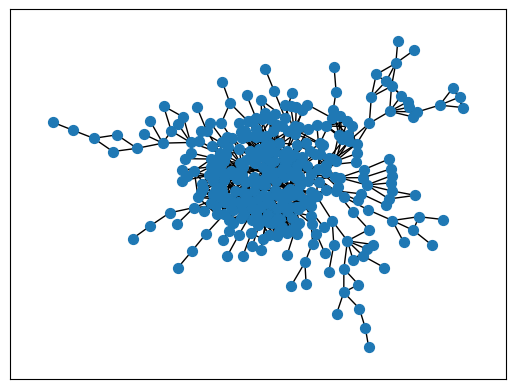

In [9]:
import networkx as nx
#Now we plot the nodes with a Kamada-Kawai layout, where the size and the color of the nodes depend on the betweenness centrality and the pagerank.
pathcollection = nx.draw_networkx_nodes(H,
        pos=nx.kamada_kawai_layout(H),
        node_size=50)

#Now we plot the edges with a Kamada-Kawai layout, where the width and the color of the edges depend on the weight of the edges.
nx.draw_networkx_edges(H,
        pos=nx.kamada_kawai_layout(H))

In [4]:
dictionary

{'used_graph': <networkx.classes.graph.Graph at 0x11c8732d0>,
 'num_edges_removed': 4,
 'component_1': [2124957697,
  1493596129,
  2159080219,
  2170112109,
  1524326598,
  1973948212,
  2008906462,
  2149706766,
  2017337590,
  1988790447,
  2164598857,
  1991605728,
  2137401668,
  2031489346,
  2161969291,
  2145072179,
  2117228865,
  2128017662,
  2124404372,
  2177274842,
  2163808566,
  1989702938,
  2121601095,
  1560013842,
  2033419168,
  2123921160,
  2217896605,
  2133671888,
  2076063813,
  1638203394,
  1964357740,
  2054658115,
  2096710051,
  1817561967,
  1680392829,
  2153233077,
  2161160262,
  1971784203,
  1992419399,
  1639032689,
  2116661285,
  1612556207,
  2167159964,
  2125899728,
  2106334424,
  2151554678,
  2104670598,
  2107941094,
  2042986967,
  1975442866,
  2036265926,
  2019363670,
  2108995755,
  2106053110,
  2122111042,
  2147169507,
  2126385963,
  2026161499,
  1647729745,
  2142827986,
  1506285740,
  2166559705,
  2158454296,
  2122646361,
  